* Load given detectron checkpoint
* create dataset given img-pose directories
* Get detectron outputs given those imgs with grundtruth
* Show qualitative results
* evaluate using accuracy

In [2]:
from google.colab import drive
%load_ext autoreload
%autoreload 2

drive.mount('/content/gdrive') #inbedpose

!cp "/content/gdrive/My Drive/CODES_inbedpose_estimation/transfer_modules.py" '/content'
!cp "/content/gdrive/My Drive/CODES_inbedpose_estimation/inbed_pose_estimation/requirements.txt" '/content/'

!cp -r '/content/gdrive/MyDrive/In-Bed-Human-Pose-Estimation(VIP-CUP)' '/content'

!bash requirements.txt

  Created wheel for detectron2: filename=detectron2-0.4.1-cp37-cp37m-linux_x86_64.whl size=5538036 sha256=f74c5849653fae1b6e85cedc65859bb717136dac90de412bdaa56726c149b523
  Stored in directory: /tmp/pip-ephem-wheel-cache-p2d2294q/wheels/07/dc/32/0322cb484dbefab8b9366bfedbaff5060ac7d149d69c27ca5d
  Created wheel for fvcore: filename=fvcore-0.1.5.post20210722-py3-none-any.whl size=60612 sha256=a9abd0b0cbf79b14768274d776ae9ecfa05fb22b3a8f3548197fd06b52727d82
  Stored in directory: /root/.cache/pip/wheels/a6/99/bf/2ee4e2098402c3b918173613ff34384b0185e87198af9d44f9
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-py3-none-any.whl size=141229 sha256=ef7cd32b870c63bbf48d55cac36e2bb88ad26a2416d032a17be1cdb037cbb69d
  Stored in directory: /root/.cache/pip/wheels/ca/33/b7/336836125fc9bb4ceaa4376d8abca10ca8bc84ddc824baea6c
Successfully built detectron2 fvcore antlr4-python3-runtime
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    U

In [ ]:
from transfer_modules import send_modules, recieve_modules
recieve_modules()
#send_modules()

modules recieved to : /content/inbed_pose_estimation/modules


In [ ]:
!rm -rf /content/checkpoints/
!cp -r '/content/gdrive/My Drive/In-Bed-Human-Pose-Estimation(VIP-CUP)/Detectron2_supplementary_udith/saved_outputs_v3_fixed_bbox/' '/content/checkpoints'

In [ ]:
import sys
sys.path.append('/content/inbed_pose_estimation')

import glob
import numpy as np
from modules.utils.sorting_functions import sort_by_subject
from modules.evaluation.quant_analysis import quantitative_analysis


train_uncover=  []
for data_dir in glob.glob('In-Bed-Human-Pose-Estimation(VIP-CUP)/train/*'):
    if int(data_dir[-5:])<=30:train_uncover.append(data_dir)
train_uncover_dirs= sorted(train_uncover, key=sort_by_subject)

_KEYPOINT_THRESHOLD : 0.0


100
200


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Acc(without TL) : 0.609729352294408
Acc(with TL) : 0.8518321826872013


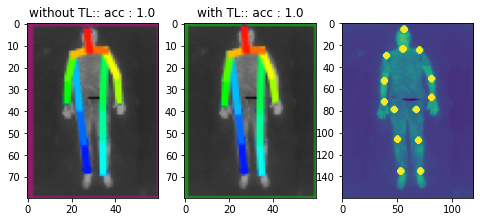

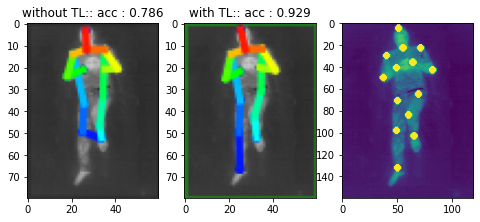

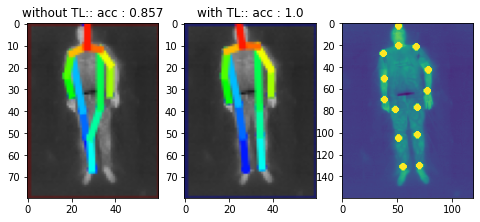

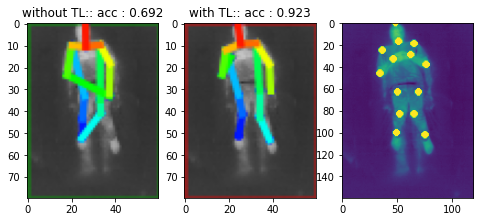

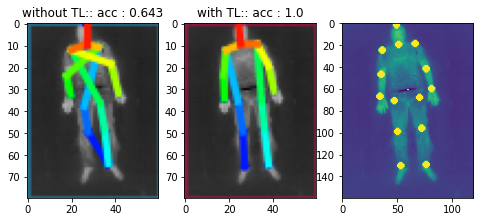

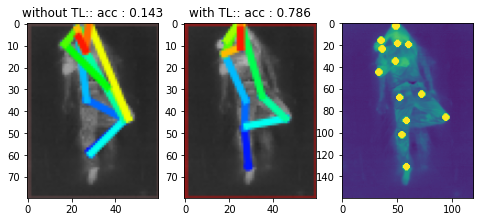

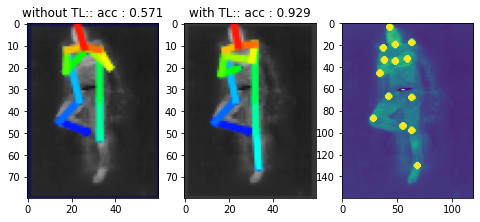

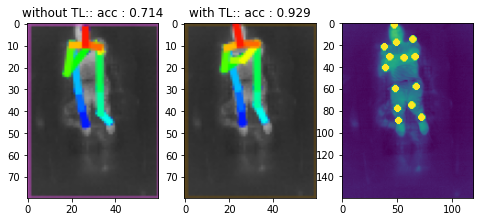

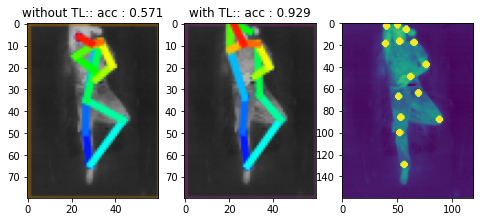

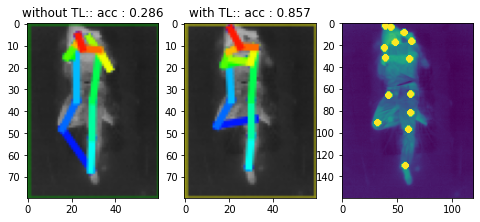

In [ ]:
data_dirs = train_uncover_dirs[24:]
type_= 'IR' 
img_folder_name = 'uncover'
# full img directories will be: eg: f'{data_dirs[i]}/{type_}/{img_folder_name}/image_000001.jpg'

full_model_dir1 = '/content/checkpoints/lwir_uncover/model_final.pth'
full_model_dir2 = '/content/checkpoints/lwir_uncover_transfer_learned/model_final.pth'

label_model1 ='without TL'
label_model2 = 'with TL'

quantitative_analysis(data_dirs, type_, img_folder_name, n_samples= None, bbox_style= 'fixed_to_img_size', 
                      full_model_dir1=full_model_dir1, full_model_dir2=full_model_dir2, 
                      label_model1=label_model1, label_model2=label_model2, 
                      vis_type= 'new',
                      show_n_results= 10)